In [13]:
import shap 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.modules as modules
import src.model_builder as mb
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
shap_vals = np.zeros((100,1002))

In [5]:
np.random.seed(10)
seeds = np.random.randint(0, 100000, size=100)

In [6]:
params = {'objective': 'reg:squarederror',
 'importance_type': 'gain',
 'learning_rate': 0.04,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 554,
 'n_jobs': 80,
 'subsample': 1,
 'verbosity': 0,
 'seed': 1,
 'silent': True}

In [7]:
for i in range(100):
    print(f"{i} ==========================================")
    model = mb.CellLevelModel("Cancer", ["ESR1"])
    model.build_datasets(seed=seeds[i])
    params["seed"] = seeds[i]
    model.build_model(params, cv=0, build_single_models=2)
    model.shap_analysis("ESR1", interaction=False)
    loc_shap_vals = model.shapley["ESR1"]["shap_vals"]
    shap_vals[i] = np.abs(loc_shap_vals).mean(axis=0)

0 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
1 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
2 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
3 ==========================================
Getting data for ESR1
Select

      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
27 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
28 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
29 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Comp

Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
54 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
55 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
56 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CA

      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
80 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
81 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Complete
MODEL BUILDING COMPLETE


Calculating shap_values for ESR1... Completed
Shap analysis completed
82 ==========================================
Getting data for ESR1
Selected 1002 input genes with alpha = 4e-19

CANCER - ESR1 

   ESR1:
      Building regression model for ESR1 using early stopping ... Comp

In [35]:
mean_shap = shap_vals.mean(axis=0)

std_shap = shap_vals.std(axis=0)

In [36]:
sorter = np.argsort(mean_shap)

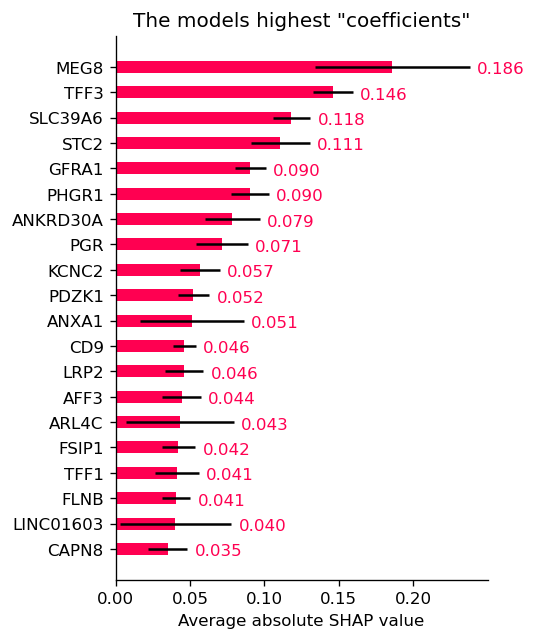

In [37]:
fig, ax = plt.subplots(figsize=(4,6), dpi=120)
ax.barh(np.linspace(0,40,20), mean_shap[sorter][-20:], align='center', height=1, color="#FF0051", xerr=std_shap[sorter][-20:])
ax.set_yticks(np.linspace(0,40,20))
ax.set_yticklabels(X.columns[sorter][-20:])
ax.set_xlabel("Average absolute SHAP value")
ax.set_title('The models highest "coefficients"')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for i, v in enumerate(mean_shap[sorter][-20:]):
        ax.text(v + std_shap[sorter][-20:][i] + 0.005, np.linspace(0,40,20)[i]-0.55, f"{v:.3f}", color="#FF0051")

In [29]:
df = pd.DataFrame(mean_shap, columns=["mean"])
df["std"] = std_shap
df["genes"] = list(X.columns)
df.set_index("genes", inplace=True)
df.sort_values("mean", axis=0, ascending=False, inplace=True)

In [11]:
X = model.datasets["ESR1"]["X_val"]